In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_context('notebook')

[Seaborn plot overview](https://seaborn.pydata.org/api.html)  
[Pyplot Docs](https://matplotlib.org/3.1.1/api/index.html)

## Subplots

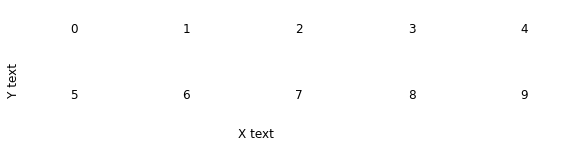

In [3]:
numplots = 10
ROWS = math.ceil(math.sqrt(numplots))  # Quadratic Layout, if in doubt, more Rows than Columns
ROWS = math.floor(math.sqrt(numplots))  # If in doubt, more Columns than Rows
ROWS = 2  # Hard coded
COLS = math.ceil(numplots / ROWS)

fig, axs = plt.subplots(nrows=ROWS, ncols=COLS, sharex=False, sharey=False, figsize=[8, 2])

for i in range(numplots):
    row = i // COLS
    col = i % COLS
    ax = axs[row, col]
    ax.axis('off')
    ax.text(0.5, 0.5, str(i))

fig.text(0.4, 0, "X text")
fig.text(0, 0.3, "Y text", rotation=90)
plt.tight_layout()

## Relational Plots (inc. Scatters and Regression)

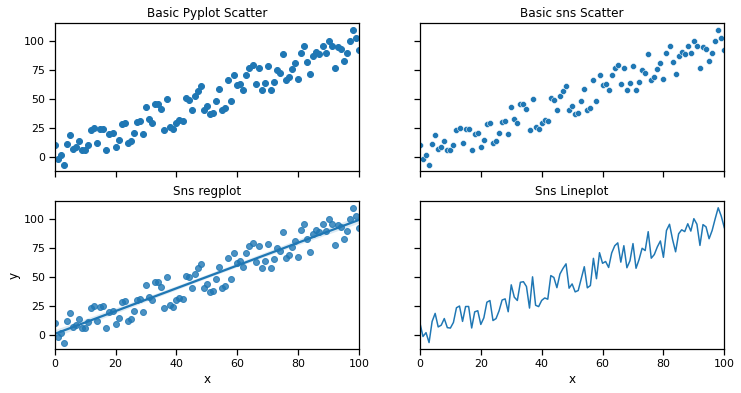

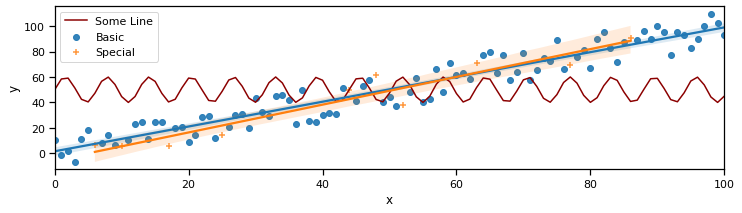

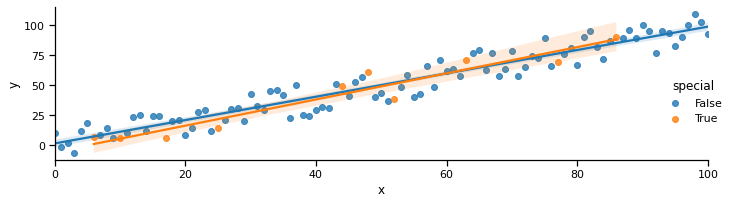

In [4]:
x = np.linspace(0, 100, 101)
y = np.linspace(0, 100, 101) + np.random.rand(101) * 30 - 15
special = np.random.choice([True, False], size=101, p=[0.1, 0.9])
df = pd.DataFrame({'x': x, 'y': y, 'special': special})

nr_examples = 4
ROWS = 2
COLS = math.ceil(nr_examples / ROWS)
fig, axs = plt.subplots(ROWS, COLS, sharex=True, sharey=True, figsize=[12, 6])
[ax0, ax1], [ax2, ax3] = axs

# Pyplot
ax0.set_title('Basic Pyplot Scatter')
ax0.scatter(x, y)

# Seaborn scatter plot
ax1.set_title("Basic sns Scatter")
sns.scatterplot(data=df, x='x', y='y', ax=ax1)

# Seaborn linear regression Scatter (For a convnient wrappers, see lmplot)
ax2.set_title("Sns regplot")
sns.regplot(data=df, x='x', y='y', ax=ax2)

# Seaborn lineplot
ax3.set_title("Sns Lineplot")
sns.lineplot(data=df, x='x', y='y', ax=ax3)

# Build a nice lmplot (regplot) by hand:
fig, ax = plt.subplots(1, 1, figsize=[12, 3])
sns.lineplot(x=df.x, y=50+10*np.sin(df.x), color='darkred', label='Some Line')
sns.regplot(data=df.loc[~df.special], x='x', y='y', ax=ax, scatter_kws={'alpha': 0.9}, label='Basic')  # Instead of a hue parameter, plot 2 regplots
sns.regplot(data=df.loc[df.special], x='x', y='y', ax=ax, marker='+', label='Special')  # Instead of a hue parameter, plot 2 regplots
plt.legend()

sns.lmplot(data=df, x='x', y='y', hue='special', height=3, aspect=3.1)

plt.tight_layout()

## Distribution Plots

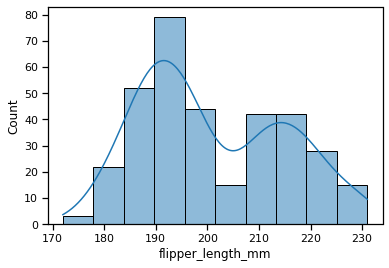

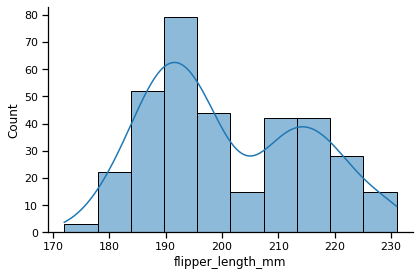

In [5]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", kde=True);  # Axis level
sns.displot(data=penguins, x="flipper_length_mm", kde=True, height=4, aspect=1.5);  # Figure level

## Changing the axes (Logarithmic, Scale, ...)

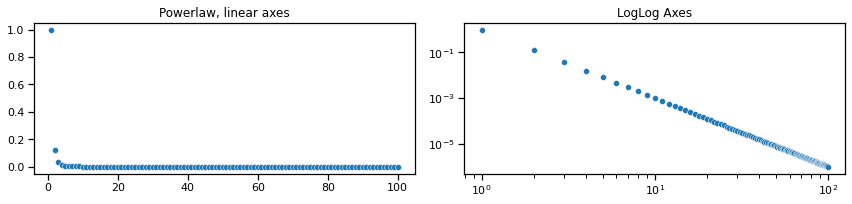

In [6]:
x = np.linspace(1, 100, 100)
y = np.power(x, -3)
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=[12, 3])
sns.scatterplot(x=x, y=y, ax=ax1)
sns.scatterplot(x=x, y=y, ax=ax2)
ax1.set_title('Powerlaw, linear axes')
ax2.set(xscale='log', yscale='log', title='LogLog Axes')
plt.tight_layout()

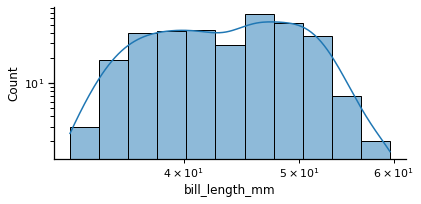

In [7]:
# Figure level
sns.displot(data=penguins, x='bill_length_mm', log_scale=[True, True], height=3, aspect=2, kde=True);

## Style

#### Setting Seaborn contexts and default color palettes. They will also be set for basic pyplots.
[Sns rc keywords](https://github.com/mwaskom/seaborn/blob/master/seaborn/rcmod.py#L14)

In [8]:
sns.set_context('poster')  # paper, notebook, talk, and poster
sns.set_palette('Blues')  # Many, e.g. Reds, CMRmap, rainbow, tab20c, winter, Set1-3...

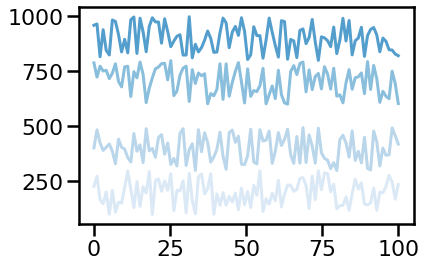

In [9]:
x = np.linspace(0, 100, 100)
y = np.random.randint(0, 1000, size=[100, 4])
y = y * 0.2 + np.asarray([100, 300, 600, 800])
plt.plot(x, y);

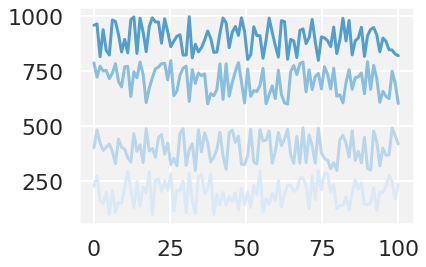

In [10]:
with sns.axes_style('darkgrid', rc={'axes.facecolor': '0.95'}):
    plt.plot(x, y)

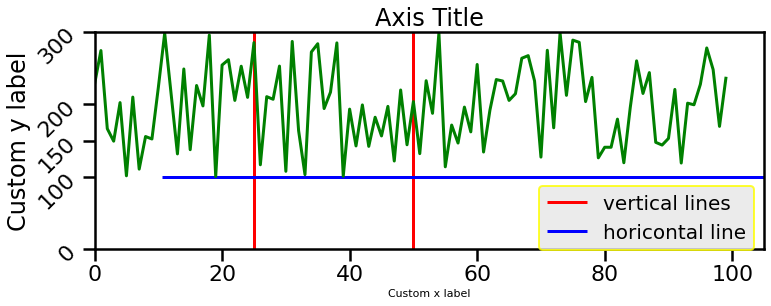

In [11]:
df = pd.DataFrame(data=y, columns=['one', 'two', 'three', 'four'])
fig, ax = plt.subplots(1, 1, figsize=[12, 4])
sns.lineplot(data=df, x=df.index, y='one', color='green', ax=ax)
ax.set_title('Axis Title')
# fig.suptitle('Figure Title')
ax.set_xlim(left=0, right=105)
ax.set_xlabel('Custom x label', fontsize=11)
ax.set(ylabel='Custom y label', ylim=[0, 300])
ax.set_yticks([0, 100, 150, 200, 300])
ax.tick_params(axis='y', rotation=45)

ax.vlines(x=[25, 50], ymin=0, ymax=1, transform=ax.get_xaxis_transform(), color='red', label='vertical lines')
ax.hlines(y=100, xmin=0.1, xmax=1, transform=ax.get_yaxis_transform(), color='blue', label='horicontal line')
plt.legend(loc='lower right', fontsize='small', fancybox=True, facecolor='.9', edgecolor='yellow', bbox_to_anchor=(1, -0.05))